In [13]:
!pip3 install html5lib lxml

In [13]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [14]:
df = {}

In [15]:
for file in os.listdir('./data/waterdata'):
    s = file.split('_')
    name = s[0]
    data = pd.read_csv('./data/waterdata/' + file)
    del data['system:index']
    del data['.geo']
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')
    if name not in df:
        df[name] = data
    else:
        df[name] = pd.concat([df[name], data], axis = 0)

In [16]:
for name in df.keys():
    df[name] = df[name].sort_index()
    df[name] = df[name][df[name].ImageCoverage >= 0.99]
    df[name].to_csv(f'data/monitordata/dam_{name}.csv')

In [41]:
df['Haixihai'].max()

ImageCoverage       1.000238
WaterArea           6.518067
WaterPixels      8110.101961
dtype: float64

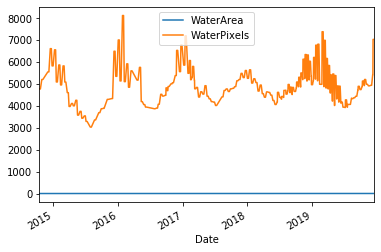

In [39]:
df['Haixihai'].plot(use_index = True, y = ['WaterArea', 'WaterPixels'])
plt.show()

In [38]:
df['Haixihai'].corr()

,ImageCoverage,WaterArea,WaterPixels
ImageCoverage,1.000000e+00,-1.365726e-14,3.363491e-15
WaterArea,-1.365726e-14,1.000000e+00,1.000000e+00
WaterPixels,3.363491e-15,1.000000e+00,1.000000e+00


In [7]:
df = pd.read_csv('data/tmp.csv', sep = ';')

In [9]:
df[df.Country == 'Thailand']

,AreasDataId,AreaId,Country,AlertLevel,Description,TypePointArea,PointsInJsonFormat,PointsNumber,BoundingBoxLonMin,BoundingBoxLonMax,...,SignalAvg,SignalSd,SignalMin,MagnitudeAvg,MagnitudeSd,MagnitudeMax,MagGreatEqual2Count,MagGreatEqual4Count,PixelIndexesMagGE2,PixelIndexesMagGE4
0,107474214,236,Thailand,2,Site 243 (Thailand),P,"{""Points"":[{""X"":3154,""Y"":822,""CoordinatesType""...",1,102.86,104.95,...,0.884817,NaN,NaN,4.889103,NaN,NaN,NaN,NaN,NaN,NaN
494,107489160,236,Thailand,2,Site 243 (Thailand),P,"{""Points"":[{""X"":3154,""Y"":822,""CoordinatesType""...",1,102.86,104.95,...,0.884817,NaN,NaN,4.889103,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
rivers = {
    '242': 'https://floodobservatory.colorado.edu/SiteDisplays/242data.htm',
    '223': 'https://floodobservatory.colorado.edu/SiteDisplays/223data.htm',
    '34': 'https://floodobservatory.colorado.edu/SiteDisplays/34data.htm',
    '239': 'https://floodobservatory.colorado.edu/SiteDisplays/239data.htm'
}

In [2]:
import pandas as pd

In [3]:
for name, link in rivers.items():
    df = pd.read_html(link)[0]
    df = df[df.index > 38].reset_index(drop = True)
    daily_df = df[[0, 1, 2, 3, 4]].copy(deep = True)
    daily_df.columns = ['Date', '5-day avg discharge (m3/sec)', 'Total flood runoff (mm)', 'Daily runoff (mm)', 'Total 7-day runoff (mm)']
    daily_df.dropna(inplace = True)
    daily_df['Date'] = pd.to_datetime(daily_df['Date'], infer_datetime_format = True)
    daily_df = daily_df.set_index('Date')
    daily_df = daily_df.astype('float32')
    daily_df.to_csv(f'data/monitordata/rw_{name}.csv')

In [7]:
daily_df

,5-day avg discharge (m3/sec),Total flood runoff (mm),Daily runoff (mm),Total 7-day runoff (mm)
Date,,,,
1998-01-07,18793.0,0.0,2.14,16.040001
1998-01-08,17645.0,0.0,2.01,15.440000
1998-01-09,17222.0,0.0,1.96,15.030000
1998-01-10,17359.0,0.0,1.98,14.670000
1998-01-11,17040.0,0.0,1.94,14.350000
...,...,...,...,...
2019-12-26,19433.0,0.0,2.21,15.470000
2019-12-27,19433.0,0.0,2.21,15.360000
2019-12-28,20132.0,0.0,2.29,15.450000
